In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mygene
import tqdm

mg = mygene.MyGeneInfo()
sns.set(style='white',palette=sns.color_palette("Set2"))

In [2]:
gene_emb = pd.read_csv("/users/hjd/Gene2vec-master/pre_trained_emb/gene2vec_dim_200_iter_9_w2v.txt",sep =' ',index_col=0,header=None)
gene_emb.dropna(how='any',axis=1,inplace=True)

In [3]:
gene_emb

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,,,,,,,,,,,,,,,,,,,,,
PLAC4,-0.032111,0.005355,-0.001208,0.392700,0.027191,0.057858,-0.065911,0.256802,0.043661,0.081228,...,0.179668,0.199858,-0.044920,0.095846,0.041332,-0.147439,0.239312,-0.183174,-0.264830,0.104818
RPS2P45,-0.433589,0.383065,0.154259,-0.044726,0.406748,0.089424,0.186105,-0.038986,0.245488,-0.712083,...,0.079383,-0.028575,0.263809,0.177087,-0.015819,0.120731,-0.219403,0.199372,0.101292,-0.054681
C3orf18,0.030009,-0.283322,0.213689,0.084640,-0.012634,-0.288767,-0.004061,-0.089572,0.249219,0.164836,...,0.037768,0.328689,0.064318,0.026143,0.005801,-0.185695,0.067693,-0.246346,-0.120931,0.157672
C6orf226,0.029573,-0.058847,-0.297716,0.257432,0.062723,0.071785,-0.079403,0.420420,0.219320,0.316385,...,0.243931,-0.075696,0.092758,0.093465,-0.191904,-0.286557,-0.140394,-0.159963,-0.223003,0.250665
CISD3,0.148815,-0.100394,0.139844,-0.156749,-0.000815,0.115267,0.101778,0.158580,0.287842,0.049861,...,0.227863,0.086968,0.062115,0.314489,-0.148824,-0.121338,-0.245106,0.247893,-0.034497,0.038109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC284219,-0.097413,0.206977,0.274137,-0.052645,-0.163830,0.080587,0.147385,-0.081156,-0.100284,0.190910,...,0.516521,-0.356231,0.259438,-0.353476,-0.510408,0.158663,-0.378703,-0.184715,0.041767,0.065761
KRTAP21-1,0.093780,-0.661438,0.342262,-0.742463,-0.402170,0.172066,1.039949,-0.706364,1.170597,-0.120575,...,-0.046443,0.347276,1.131234,0.249182,0.902638,0.147042,0.445153,-0.163675,-0.148416,0.195759
PHBP8,-0.491280,-0.335584,-0.454166,-0.134393,-0.455670,-0.137623,-0.335810,-0.065315,-0.172522,-0.110279,...,0.743257,0.116302,0.027702,-0.351308,0.163348,-0.089611,-0.345655,-0.071142,0.027078,0.223668


In [96]:
# from sklearn.manifold import TSNE

# X_embedded = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=30,n_jobs=4).fit_transform(gene_emb)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

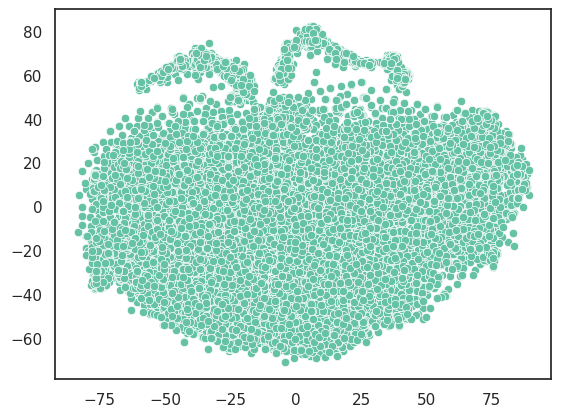

In [99]:
# sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1])

In [4]:
gtex_path = "/users/jsh/data/IG/PrediXcan/0704_elastic/results/"
gtex_files = [i for i in os.listdir(gtex_path) if 'gtex' in i]

gtex_db_path = "/users/jsh/data/IG/PrediXcan/0704_elastic/weights/ENSG_SYMBOL_match/"


['gtex_v7_Brain_Amygdala_predicted_expression.txt',
 'gtex_v7_Brain_Anterior_cingulate_cortex_BA24_predicted_expression.txt',
 'gtex_v7_Brain_Caudate_basal_ganglia_predicted_expression.txt',
 'gtex_v7_Brain_Cerebellar_Hemisphere_predicted_expression.txt',
 'gtex_v7_Brain_Cerebellum_predicted_expression.txt',
 'gtex_v7_Brain_Cortex_predicted_expression.txt',
 'gtex_v7_Brain_Frontal_Cortex_BA9_predicted_expression.txt',
 'gtex_v7_Brain_Hippocampus_predicted_expression.txt',
 'gtex_v7_Brain_Hypothalamus_predicted_expression.txt',
 'gtex_v7_Brain_Nucleus_accumbens_basal_ganglia_predicted_expression.txt',
 'gtex_v7_Brain_Putamen_basal_ganglia_predicted_expression.txt',
 'gtex_v7_Brain_Spinal_cord_cervical_c-1_predicted_expression.txt',
 'gtex_v7_Brain_Substantia_nigra_predicted_expression.txt']

In [80]:
result_df = pd.DataFrame()

for region in gtex_files:
    region_name = region.split("Brain_")[1].split("_predicted")[0]
    print(region_name)
    exp_data = pd.read_csv(gtex_path+region,sep ='\t')
    ens_list = [i.split(".")[0] for i in exp_data.columns[2:].tolist()]

    #ENSG to Gene symbols
    ensg_symb_df = pd.read_csv(gtex_db_path+region_name+"_ensg_to_symbol.csv",sep='\t',index_col=0)
    assert len(np.unique(ensg_symb_df['ensg'].value_counts().values)) ==1 #Confirm unique pair
    pairs_dict = {k:v for k,v in zip(ensg_symb_df['ensg'],ensg_symb_df['symbol'])}
    exp_data.rename(columns=pairs_dict,inplace=True)
    sym_list = exp_data.columns[2:]
    
    sym_overlapped_list = [i for i in sym_list if i in gene_emb.index]
    
    result_df.loc[region_name,'# of ENSG'] = len(ens_list)
    result_df.loc[region_name,'# of Symbol'] = len(sym_list)
    result_df.loc[region_name,'# of Symbol overlapped in Gene2Vec'] = len(sym_overlapped_list)
    result_df.loc[region_name,"overlap ratio"] = len(sym_overlapped_list)/len(sym_list)
    # break

Amygdala
Anterior_cingulate_cortex_BA24
Caudate_basal_ganglia
Cerebellar_Hemisphere
Cerebellum
Cortex
Frontal_Cortex_BA9
Hippocampus
Hypothalamus
Nucleus_accumbens_basal_ganglia
Putamen_basal_ganglia
Spinal_cord_cervical_c-1
Substantia_nigra


In [91]:
exp_data

,FID,IID,STPG1,NIPAL3,ENPP4,SEMA3F,TMEM176A,CYP26B1,RBM6,CCDC109B,...,RP11-302L19.3,RP11-458F8.4,RP5-1068E13.7,RP11-212P7.2,RP11-339B21.14,AP000350.5,PAXIP1-AS1,RP11-479O17.10,RP11-218F10.3,AP000230.1
0,AB0001956,NDAR_INV2P5R504F,0.302765,1.001402,0.0,0.663528,0.013425,-1.110802,-1.015444,-0.270107,...,-0.289326,-1.239778,0.530193,-0.144828,-0.753670,1.502336,-0.193093,-1.843751,0.164495,0.972420
1,AB0007018,NDAR_INVTTFR6F0H,0.271910,1.131476,0.0,0.502144,-0.133968,-1.395551,-0.541031,-0.231891,...,0.318015,-1.334099,0.551408,-0.445506,-0.325886,-0.172816,-0.753218,-2.433597,-0.865285,0.425384
2,AB0006599,NDAR_INVEC4FTVA6,0.477241,1.682626,0.0,0.999154,0.070442,-1.300585,-0.045459,-0.270107,...,-0.190753,-0.808532,0.105203,-0.324765,-0.275724,1.036024,-0.673772,-2.308000,-0.699924,1.013708
3,AB0005241,NDAR_INV19FYU534,0.197436,1.653466,0.0,0.561263,0.220576,-1.891754,-0.435382,-0.476643,...,-0.031746,-1.239778,0.704782,-0.144828,-0.551448,0.749270,-0.558859,-1.185367,-0.422200,0.789701
4,AB0003237,NDAR_INVT0R82YDJ,0.400517,1.081019,0.0,0.824469,0.032530,-0.688603,-0.519872,-0.449567,...,0.318015,-1.331411,0.496423,-0.445506,-0.955893,0.555289,-0.235710,-1.809997,-0.065906,0.687269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,AB0020762,NDAR_INVM9ZZ5KAT,0.187415,1.522453,0.0,0.688575,0.096418,-1.482584,-1.015444,-0.042586,...,0.014344,-1.403902,0.570057,-0.024087,-0.753670,0.663587,-0.888845,-2.059121,-0.378692,0.104055
2788,AB0020900,NDAR_INVCE9MY4X4,0.298266,1.813639,0.0,1.430192,0.379725,-1.204657,-0.024300,-0.294100,...,-0.269801,-0.784013,0.570057,-0.324765,-0.477946,0.254485,-0.651228,-2.258600,-0.355964,0.767600
2789,AB0020927,NDAR_INV39DNG05T,0.271910,1.712724,0.0,0.403566,0.935432,-1.691721,-0.909795,-0.746135,...,0.225835,-0.738207,0.105203,-0.324765,-0.252385,0.331273,-0.154983,-2.373143,0.176107,0.621240
2790,AB0021570,NDAR_INV540M2VDX,0.289667,1.493294,0.0,0.956422,0.594039,-1.359505,-0.414223,0.223267,...,0.271925,-0.808532,0.691369,-0.324765,-0.753670,-0.172816,-0.737803,-2.441489,-1.125695,0.955462


In [81]:
result_df

,# of ENSG,# of Symbol,# of Symbol overlapped in Gene2Vec,overlap ratio
Amygdala,2362.0,2362.0,1853.0,0.784505
Anterior_cingulate_cortex_BA24,3303.0,3303.0,2528.0,0.765365
Caudate_basal_ganglia,4182.0,4182.0,3218.0,0.769488
Cerebellar_Hemisphere,4758.0,4758.0,3745.0,0.787095
Cerebellum,6093.0,6093.0,4851.0,0.796160
Cortex,4329.0,4329.0,3376.0,0.779857
Frontal_Cortex_BA9,3604.0,3604.0,2750.0,0.763041
Hippocampus,2816.0,2816.0,2156.0,0.765625
Hypothalamus,2835.0,2835.0,2139.0,0.754497
Nucleus_accumbens_basal_ganglia,3631.0,3631.0,2730.0,0.751859


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

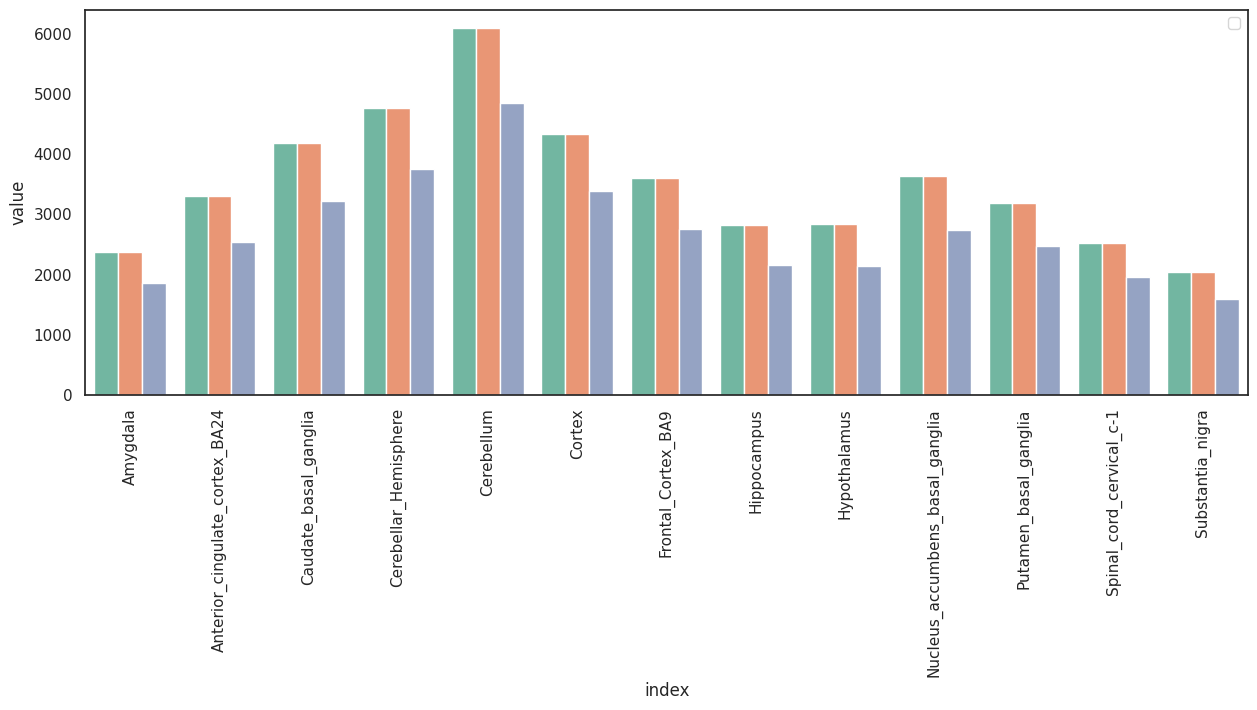

In [179]:
result_df_melt = result_df.reset_index(drop=False).melt(id_vars=['index','overlap ratio'])
plt.figure(figsize=(15,5))
sns.barplot(data = result_df_melt,x='index',y='value',hue='variable')
plt.xticks(rotation=90)
plt.legend([])

In [132]:
#Check gene-coexpression
corr = exp_data.iloc[:,2:].corr()
corr.dropna(how='all',axis=1,inplace=True)
corr.dropna(how='all',axis=0,inplace=True)

<Axes: >

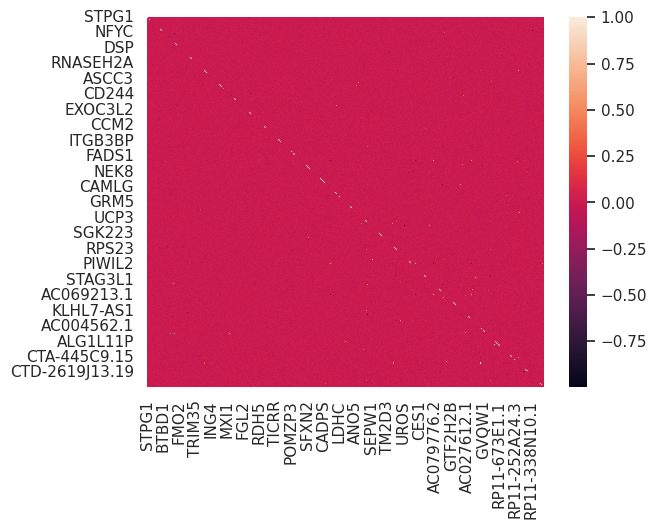

In [134]:
sns.heatmap(corr)

In [171]:
co_express = np.where(np.tril(corr,-1)>0.9)
for row_idx,col_idx in zip(co_express[0],co_express[1]):
    print(corr.index[row_idx], corr.columns[col_idx], corr.iloc[row_idx,col_idx])

TRIM35 STMN4 0.9213305344879872
GSTT2B GSTT2 0.9571985743805428
ZNF177 ZNF559 0.9602569225383085
NBR2 RND2 0.9612399991441725
LNP1 NIT2 0.9946430139912619
AP000350.4 GSTT1 0.9489024573345958
RAB6C AC079776.2 0.9890252427369598
RP11-479O9.2 ERV3-1 0.9218867272725736
AP000351.8 GSTT1 0.9702111256052083
AP000351.8 AP000350.4 0.9606000613785872
RP4-610C12.3 RP4-610C12.4 0.9694738180619915
RP11-460N20.5 ERV3-1 0.96924167362838
RP11-460N20.5 RP11-479O9.2 0.9033866046304176
GTF2H2B SERF1A 0.9180985843084675
PSPHP1 PSPH 0.9562742719760808
USP32P2 FAM106A 0.9923821505876893
CCT6P3 ERV3-1 0.9579335128592609
CCT6P3 RP11-460N20.5 0.939955466357221
AP000351.10 GSTT1 0.9305578978990887
AP000351.10 AP000351.8 0.9050216026232275
RP3-470B24.5 KIF25-AS1 0.9644245200482904
AC104135.2 AC104135.3 0.9204570249426588
LRRC37A2 CRHR1-IT1 0.9715573561031927
RPL13P5 SPSB2 0.9216174514409499
STAG3L5P PILRB 0.9954848331365681
RP11-274B21.3 RP11-274B21.4 0.9734535461935261
RP11-274B21.3 RP11-274B21.1 0.911345860728

In [280]:
gene_name = "STPG1"

gene_exp_temp = exp_data.loc[:,gene_name].values
gene_emb_temp = gene_emb.loc[gene_name,:].values

In [281]:
gene_exp_temp.shape, gene_emb_temp.shape

((2792,), (200,))

In [311]:
gene_out_temp = np.dot(gene_exp_temp.reshape(-1,1),gene_emb_temp.reshape(1,-1))
gene_out_temp.shape

(2792, 200)

In [291]:
g1 = gene_emb.loc["ZNF177",:].values
g2 = gene_emb.loc["ZNF559",:].values

In [297]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [304]:
cos_sim(3*g1,gene_emb_temp)

0.18387501565629874

In [302]:
stats.pearsonr(g1,gene_emb_temp)

PearsonRResult(statistic=0.18453986952045293, pvalue=0.00889832941927722)